In [34]:
import csv
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [3]:
Terry = []
Zilu = []
Feng = []
with open('labelled_users_by3.csv', newline='') as csvfile:
    spamreader = csv.DictReader(csvfile)
    for row in spamreader:
        Terry.append(row['Terry'])
        Zilu.append(row['Zilu'])
        Feng.append(row['Feng'])

In [4]:
cohen_kappa_score(Terry, Zilu)

0.8270464594513035

In [7]:
cohen_kappa_score(Terry, Feng)

0.7730572368293015

In [6]:
cohen_kappa_score(Feng, Zilu)

0.8499356685935886

In [8]:
contingency_table, sum_ratings = aggregate_raters(np.transpose([Terry,Zilu,Feng]))
fleiss_kappa(contingency_table, method='fleiss')

0.8172310471840346

In [21]:
print("Contingency Table:\n", contingency_table)
print("Sum of Ratings for Each Item:", sum_ratings)

Contingency Table:
 [[0 3]
 [2 1]
 [3 0]
 ...
 [3 0]
 [3 0]
 [3 0]]
Sum of Ratings for Each Item: ['0' '1']


In [36]:
# all aggregated, for data visual
real_total_posts = []
fake_total_posts = []
with open('for_analysis.csv', newline='') as csvfile:
    spamreader = csv.DictReader(csvfile)
    for row in spamreader:
        if row['fake'] == '1':
            fake_total_posts.append(int(row['total_posts']))
        else:
            real_total_posts.append(int(row['total_posts'])) 

In [50]:
len(fake_total_posts)+len(real_total_posts)

4210

In [38]:
statistics.mean(fake_total_posts)

15584.245721271394

Text(0.5, 1.0, "histogram for fake users's total posts number")

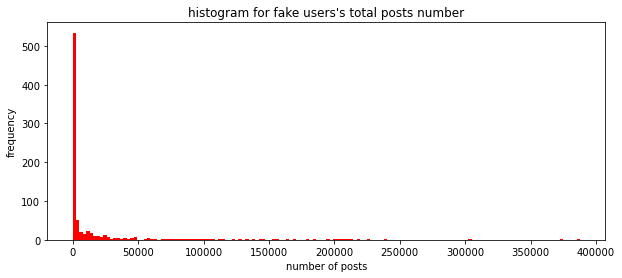

In [42]:
plt.figure(figsize=(10, 4))
plt.hist(fake_total_posts, bins=150, color='red')
# plt.xticks(rotation='vertical')
plt.xlabel('number of posts')
plt.ylabel('frequency')
plt.title("histogram for fake users's total posts number")


Text(0.5, 1.0, "histogram for real users's total posts number")

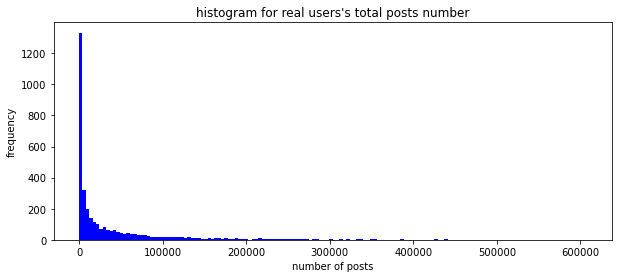

In [45]:
plt.figure(figsize=(10, 4))
plt.hist(real_total_posts, bins=150, color='blue')
# plt.xticks(rotation='vertical')
plt.xlabel('number of posts')
plt.ylabel('frequency')
plt.title("histogram for real users's total posts number")

In [54]:
df = pd.read_csv('for_analysis.csv')
df['description_length'] = df['description'].astype(str).apply(lambda x: len(x.split()))


In [60]:
df['allow_question'].describe()

count     4210
unique       2
top       True
freq      3240
Name: allow_question, dtype: object

In [57]:
statistics.mean(df['description_length']), min(df['description_length']), max(df['description_length'])

(12.837767220902613, 0, 242)

In [69]:
df[df['fake'] == 1]['allow_question'].describe()

count      818
unique       2
top       True
freq       482
Name: allow_question, dtype: object

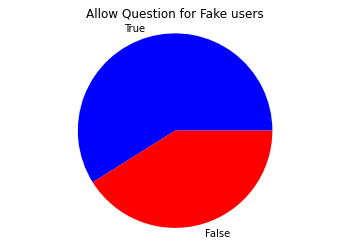

In [70]:
# pie chart for question and question_anon for fake users
plt.pie([482, 818-482], labels=['True', 'False'], colors=['blue', 'red'])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Allow Question for Fake users')
plt.show()

In [71]:
df[df['fake'] == 0]['allow_question'].describe()

count     3387
unique       2
top       True
freq      2755
Name: allow_question, dtype: object

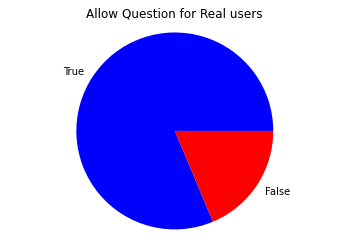

In [72]:
# pie chart for question and question_anon for real users
plt.pie([2755, 3387-2755], labels=['True', 'False'], colors=['blue', 'red'])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Allow Question for Real users')
plt.show()